In [16]:
!pip install chemprop

In [17]:
!git clone https://github.com/emadalibrahim/Fusion-Cycle.git
!cd Fusion-Cycle


Cloning into 'Fusion-Cycle'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 153 (delta 57), reused 52 (delta 18), pack-reused 26 (from 2)
Receiving objects: 100% (153/153), 285.52 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (751/751), done.


In [18]:
# 1. 强制进入项目文件夹（注意使用 % 符号而不是 !）
%cd /content/Fusion-Cycle
# 2. 检查当前目录下是否有 Fusion_Cycle.py 确认位置
!ls
# 3. 尝试导入
import Fusion_Cycle
print("导入成功！")

/content/Fusion-Cycle
chemprop			   Example_run.ipynb	   __pycache__
default.py			   Fusion-Cycle		   README.md
Density				   Fusion_Cycle.py	   Results.csv
Dockerfile_FC_cpu		   Fusion_Cycle_Server.py  Server_test.py
Example_COSMOtherm_input_file.inp  lightning_logs	   trained_models
example_data.csv		   logs
导入成功！


In [19]:
import os
print(os.listdir())

['Server_test.py', '__pycache__', 'README.md', 'lightning_logs', 'Example_run.ipynb', 'trained_models', 'Example_COSMOtherm_input_file.inp', 'Density', 'default.py', 'Fusion-Cycle', 'example_data.csv', 'Dockerfile_FC_cpu', '.git', 'Fusion_Cycle_Server.py', 'Results.csv', 'Fusion_Cycle.py', 'chemprop', 'logs']


In [27]:

import pandas as pd
import numpy as np
import Fusion_Cycle

In [28]:
test_path = "example_data.csv" # path to your .csv file containing SMILES strings to make predictions for

# Load dataframe
df = pd.read_csv(test_path)

In [29]:
train_path = "example_data.csv" # path to your .csv file containing training data
df_train = pd.read_csv(train_path)
# training_data # This line was trying to access a variable that doesn't exist after loading the dataframe, so I commented it out.

In [23]:
display(df_train.head())

,solute_smiles_canonical,solvent_smiles_canonical,solute_inchi,solute_smiles,solute_name,solvent_inchi,solvent_smiles,solvent_name,Temperature [K],Solubility,...,MP_pred,MP_std,ln_gamma_pred_i10,ln_gamma_std_i10,logS_calc_i10_PT,logS_calc_i0_PT,logS_calc_i0_FT,logS_calc_i10_FT,gamma,gamma_std
0,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,Cc1ccccc1,InChI=1/C16H14O3/c1-11(16(18)19)13-8-5-9-14(10...,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,Ketoprofen,"InChI=1/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3",CC1=CC=CC=C1,toluene,278.15,0.00762,...,358.5078,4.528252,2.723557,0.287614,-1.720867,-1.767675,-1.482345,-1.397452,2.723558,0.287614
1,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,CC#N,InChI=1/C16H14O3/c1-11(16(18)19)13-8-5-9-14(10...,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,Ketoprofen,InChI=1/C2H3N/c1-2-3/h1H3,CC#N,acetonitrile,298.15,0.03301,...,358.5078,4.528252,0.758220,0.066176,0.204738,0.010594,-0.006000,0.110358,0.758220,0.066176
2,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,CC#N,InChI=1/C16H14O3/c1-11(16(18)19)13-8-5-9-14(10...,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,Ketoprofen,InChI=1/C2H3N/c1-2-3/h1H3,CC#N,acetonitrile,278.15,0.01210,...,358.5078,4.528252,1.024787,0.158369,-0.304965,-0.403928,-0.423004,-0.352306,1.024787,0.158369
3,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,CC#N,InChI=1/C16H14O3/c1-11(16(18)19)13-8-5-9-14(10...,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,Ketoprofen,InChI=1/C2H3N/c1-2-3/h1H3,CC#N,acetonitrile,288.15,0.01900,...,358.5078,4.528252,0.918791,0.095271,-0.057415,-0.189160,-0.206845,-0.126536,0.918791,0.095271
4,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,CC(C)O,InChI=1/C16H14O3/c1-11(16(18)19)13-8-5-9-14(10...,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,Ketoprofen,"InChI=1/C3H8O/c1-3(2)4/h3-4H,1-2H3",CC(C)O,2-propanol,293.15,0.08640,...,358.5078,4.528240,-0.214575,0.141373,0.365074,0.338426,0.269522,0.287473,-0.214575,0.141373


In [25]:
import pandas as pd
import numpy as np
import os
import torch
from lightning import pytorch as pl
from pathlib import Path
from chemprop import data, featurizers,models
from chemprop.models import multi
# from mixtures import ComponentDatapoint, MixtureDataset, MixtureMPNN, collate_mixture
from torch.utils.data import DataLoader

from Density.QSPR import fill_solvent_density

# Detect number of available CUDA devices
num_devices = torch.cuda.device_count()

if num_devices > 0:
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"
    device = torch.device("cuda")
    print(f"Using GPU device 0 (total available: {num_devices})")
else:
    os.environ["CUDA_VISIBLE_DEVICES"] = ""
    device = torch.device("cpu")
    print("No GPU detected, running on CPU")


class model:
    def __init__(self, N_iteration=10, thresh=0.99, Num_ensembles = 5, mixture = False):
        self.N_iteration = N_iteration
        self.thresh = thresh
        self.Num_ensembles = Num_ensembles
        self.R = 1.98720425864083/1000 # Kcal K-1 mol-1
        self.mixture = mixture

    # Function that takes in a list of single molecule
    # model paths and a test dataframe
    # It returns a list of predictions for the smiles in
    # the 'solute_smiles_canonical' columns of the dataframe
    def predict_single(self,checkpoint_path_list,df_test):
        pred_list = []
        for checkpoint_path in checkpoint_path_list:
            if '.ckpt' in str(checkpoint_path):
                mpnn = models.MPNN.load_from_checkpoint(checkpoint_path,map_location=device)
            else:
                mpnn = models.MPNN.load_from_file(checkpoint_path,map_location=device)
            smiles_columns = 'solute_smiles_canonical' # name of the column containing SMILES strings
            smis = df_test[smiles_columns].values
            test_data = [data.MoleculeDatapoint.from_smi(smi) for smi in smis]
            featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()
            test_dset = data.MoleculeDataset(test_data, featurizer=featurizer)
            test_loader = data.build_dataloader(test_dset, shuffle=False,batch_size=1)
            with torch.inference_mode():
                trainer = pl.Trainer(
                    logger=None,
                    enable_progress_bar=True
                )
            test_preds = trainer.predict(mpnn, test_loader)
            test_preds = np.concatenate(test_preds, axis=0)
            pred_list.append(test_preds)
        return pred_list

    # Function that takes in a list of mlticomponent MPNN
    # model paths, a test dataframe, and a vector of molar fraction x
    # It the dataframe with mean and std of gamma predictions for the
    # solutes in 'solute_smiles_canonical' and solvents in 'solvent_smiles_canonical'
    # of the columns of the dataframe
    def predict(self,checkpoint_path_list,df_test,x):
        if self.mixture:
            pred_list = []
            for checkpoint_path in checkpoint_path_list:
                if '.pt' in str(checkpoint_path):
                    mcmpnn = MixtureMPNN.load_from_file(checkpoint_path,map_location=device)
                else:
                    mcmpnn = MixtureMPNN.load_from_checkpoint(checkpoint_path,map_location=device)
                smiles_columns = ["mol_solute", "mol_solvent1", "mol_solvent2"]  # name of the column containing SMILES strings
                frac_columns = ["frac_solvent1"]
                target_columns = ["gamma"]  # list of names of the columns containing targets
                smiss = df_test.loc[:, smiles_columns].values
                fracs = df_test.loc[:, frac_columns]
                fracs["frac_solvent1"] = fracs["frac_solvent1"].fillna(1.0) # fill in empty molfracs columns with just one component
                fracs = fracs.values
                ys = df_test.loc[:, target_columns].values
                df_input['frac_solute'] = x
                extra_datapoint_descriptors = df_input[['frac_solute','temperature']].values
                all_data = [[data.MoleculeDatapoint.from_smi(smis[0], y, x_d = X_d) for smis, y, X_d in zip(smiss, ys, extra_datapoint_descriptors)]]
                all_data += [[ComponentDatapoint.from_smi(smis[1], w_fp=f[0]) for smis, f in zip(smiss, fracs)]]
                all_data += [[ComponentDatapoint.from_smi(smis[2], w_fp=1-f[0]) if smis[2] else ComponentDatapoint(None) for smis, f in zip(smiss, fracs)]]
                test_datasets = [
                    data.MoleculeDataset(all_data[0]),
                    ComponentDataset(all_data[1]),
                    ComponentDataset(all_data[2]),
                ]
                test_mcdset = MixtureDataset(test_datasets)
                test_loader = DataLoader(test_mcdset, batch_size=64, shuffle=False, collate_fn=collate_mixture, num_workers=20)
                with torch.inference_mode():
                    trainer = pl.Trainer(
                        logger=None,
                        enable_progress_bar=True,
                        accelerator="auto",
                        devices=1
                    )
                    results = trainer.predict(mcmpnn, test_loader)
                test_preds = np.concatenate([t.numpy().flatten() for t in results])
                pred_list.append(test_preds)
            df_test['ln_gamma'] = np.array(pred_list)[:,:,0].mean(axis=0)
            df_test['ln_gamma_std'] = np.array(pred_list)[:,:,0].std(axis=0)
            return df_test
        else:
            pred_list = []
            for checkpoint_path in checkpoint_path_list:
                if '.pt' in str(checkpoint_path):
                    mcmpnn = multi.MulticomponentMPNN.load_from_file(checkpoint_path,map_location=device)
                else:
                    mcmpnn = multi.MulticomponentMPNN.load_from_checkpoint(checkpoint_path,map_location=device)
                smiles_columns = ['solute_smiles_canonical', 'solvent_smiles_canonical'] # name of the column containing SMILES strings
                smiss = df_test[smiles_columns].values
                n_componenets = len(smiles_columns)
                X_d = np.concatenate([x,df_test[['Temperature [K]']].to_numpy()],axis=1)
                test_datapointss = [[data.MoleculeDatapoint.from_smi(smi, x_d=X_d) for smi,X_d in zip(smiss[:, i],X_d)] for i in range(n_componenets)]
                featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()
                test_dsets = [data.MoleculeDataset(test_datapoints, featurizer) for test_datapoints in test_datapointss]
                test_mcdset = data.MulticomponentDataset(test_dsets)
                test_loader = data.build_dataloader(test_mcdset, shuffle=False,batch_size=1)
                with torch.inference_mode():
                    trainer = pl.Trainer(
                        logger=None,
                        enable_progress_bar=True,
                        accelerator="auto",
                        devices=1
                    )
                    test_preds = trainer.predict(mcmpnn, test_loader)
                test_preds = np.concatenate(test_preds, axis=0)
                pred_list.append(test_preds)
            df_test['ln_gamma'] = np.array(pred_list)[:,:,0].mean(axis=0)
            df_test['ln_gamma_std'] = np.array(pred_list)[:,:,0].std(axis=0)
            return df_test

    # Function to calculate molar fraction
    # It takes in the molar fraction x0 and
    # a dataframe that has columns for MP_pred,
    # dHfus_pred, Temperature [K], and gamma
    # It uses a default threshold of 0.99 as
    # maximum allowable mole fraction
    # it returns molar fraction x
    def calc_x_solid(self,x0,df,checkpoint_path_list):
        df = self.predict(checkpoint_path_list,df,pd.DataFrame(x0).to_numpy()) # predict gamma at x0
        x = np.exp(df['dHfus_pred']/(self.R) * ((1/df['MP_pred']) - (1/df['Temperature [K]'])) - (df['ln_gamma']) )
        x[x>self.thresh] = self.thresh
        return x,np.exp(df['ln_gamma'])

    # Function that calculates solid solubililty
    # it takes in a dataframe with columns
    # 'solute_smiles_canonical', 'solvent_smiles_canonical',
    # 'Temperature [K]', and 'solvent_density'
    # the function predicts MP based on trained
    # models. Then it iterates with an initial guess of gamma=0
    # to approximate solubility at saturation
    def calculate_solubility_solid(self,df):
        print('solid',df.shape[0])
        # Predict dHfus
        checkpoint_path_list = []
        for i in range(self.Num_ensembles):
            checkpoint_path_list.append('trained_models/dHfus/model_'+str(i)+'.pt')
        preds = self.predict_single(checkpoint_path_list,df)
        df['dHfus_pred'] = np.array(preds)[:,:,0].T.mean(axis=1)
        df['dHfus_std'] = np.array(preds)[:,:,0].T.std(axis=1)
        # Calculate solubility
        checkpoint_path_list = []
        for i in range(self.Num_ensembles):
            if self.mixture:
                checkpoint_path_list.append('trained_models/model_gamma_mix_FT_'+str(i)+'.pt')
            else:
            # checkpoint_path_list.append('trained_models/gamma/model_'+str(i)+'.pt')
                checkpoint_path_list.append('trained_models/gamma/model_final_'+str(i)+'.pt')
        x = df[['dHfus_std']] * 0 # initialize at infinite dilution
        for i in range(self.N_iteration): # Iterate to adjust for x
            x,gamma = self.calc_x_solid(x,df,checkpoint_path_list)
            S = x * df['solvent_density']
            logS = np.log10(S)
        return logS,gamma

    # Function to calculate molar fraction
    # It takes in the molar fraction x1, x2,
    # and a dataframe.
    # It uses a default threshold of 0.99 as
    # maximum allowable mole fraction
    # it returns molar fractions x1 and x2
    def calc_x_liquid(self,x1,x2,df,checkpoint_path_list):
        df = self.predict(checkpoint_path_list,df,pd.DataFrame(x2).to_numpy())
        gamma2 = np.exp(df['ln_gamma'])
        df = self.predict(checkpoint_path_list,df,pd.DataFrame(x1).to_numpy())
        gamma1 = np.exp(df['ln_gamma'])
        x1 = gamma2/gamma1 * x2.values.flatten()
        x1[x1>self.thresh] = self.thresh
        df = self.predict(checkpoint_path_list,df,pd.DataFrame(x1).to_numpy())
        gamma1 = np.exp(df['ln_gamma'])
        x2 = gamma1/gamma2 * x1.values.flatten()
        x2[x2>self.thresh] = self.thresh
        return x1,x2,gamma1,gamma2

    # Function that calculates liquid solubililty
    # it takes in a dataframe with columns
    # 'solute_smiles_canonical', 'solvent_smiles_canonical',
    # 'Temperature [K]', and 'solvent_density'
    # The function iterates with an initial guess of x1=0
    # and x2=1 to approximate solubility at saturation
    def calculate_solubility_liquid(self,df):
        print('liquid',df.shape[0])
        # Calculate solubility
        checkpoint_path_list = []
        for i in range(self.Num_ensembles):
            if self.mixture:
                checkpoint_path_list.append('trained_models/model_gamma_mix_FT_'+str(i)+'.pt')
            else:
            # checkpoint_path_list.append('trained_models/gamma/model_'+str(i)+'.pt')
                checkpoint_path_list.append('trained_models/gamma/model_final_'+str(i)+'.pt')
        x1 = df[['MP_std']] * 0.0 # initialize solvent-rich phase
        x2 = x1 + 1.0 # initialize solute-rich phase
        for i in range(self.N_iteration): # Iterate to adjust for x
            x1,x2,gamma1,gamma2 = self.calc_x_liquid(x1,x2,df,checkpoint_path_list)
            S = x1 * df['solvent_density']
            logS = np.log10(S)
        return logS,gamma1

    def calculate_solubility(self,df):
        # Use QSPR to fill in missing solvent densities (approximated at 298K)
        df = fill_solvent_density(df)
        # Predict MP
        checkpoint_path_list = []
        for i in range(self.Num_ensembles):
            checkpoint_path_list.append('trained_models/MP/model_'+str(i)+'.pt')
        preds = self.predict_single(checkpoint_path_list,df)
        df['MP_pred'] = np.array(preds)[:,:,0].T.mean(axis=1)
        df['MP_std'] = np.array(preds)[:,:,0].T.std(axis=1)
        # Split data to solid/liquid
        idx = df['MP_pred']>df['Temperature [K]']
        df_solid  = df[ idx].reset_index(drop=True)
        df_liquid = df[-idx].reset_index(drop=True)
        # Route to functions
        df['logS_calc'] = 0.0 # initalize
        df['gamma'] = 0.0 # initalize
        if df_solid.shape[0]>0:
            logS, gamma = self.calculate_solubility_solid(df_solid)
            df.loc[idx, ['logS_calc', 'gamma']] = np.vstack([logS, gamma]).T
            # df.loc[ idx,['logS_calc','gamma']] = self.calculate_solubility_solid(df_solid)
        if df_liquid.shape[0]>0:
            logS, gamma = self.calculate_solubility_liquid(df_liquid)
            df.loc[-idx,['logS_calc','gamma']] = np.vstack([logS, gamma]).T
            # df.loc[-idx,['logS_calc','gamma']] = self.calculate_solubility_liquid(df_liquid)
        df.to_csv('Results.csv',index=False)
        return df['logS_calc']

No GPU detected, running on CPU


In [24]:
model = Fusion_Cycle.model()
logS = model.calculate_solubility(df)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

solid 100


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


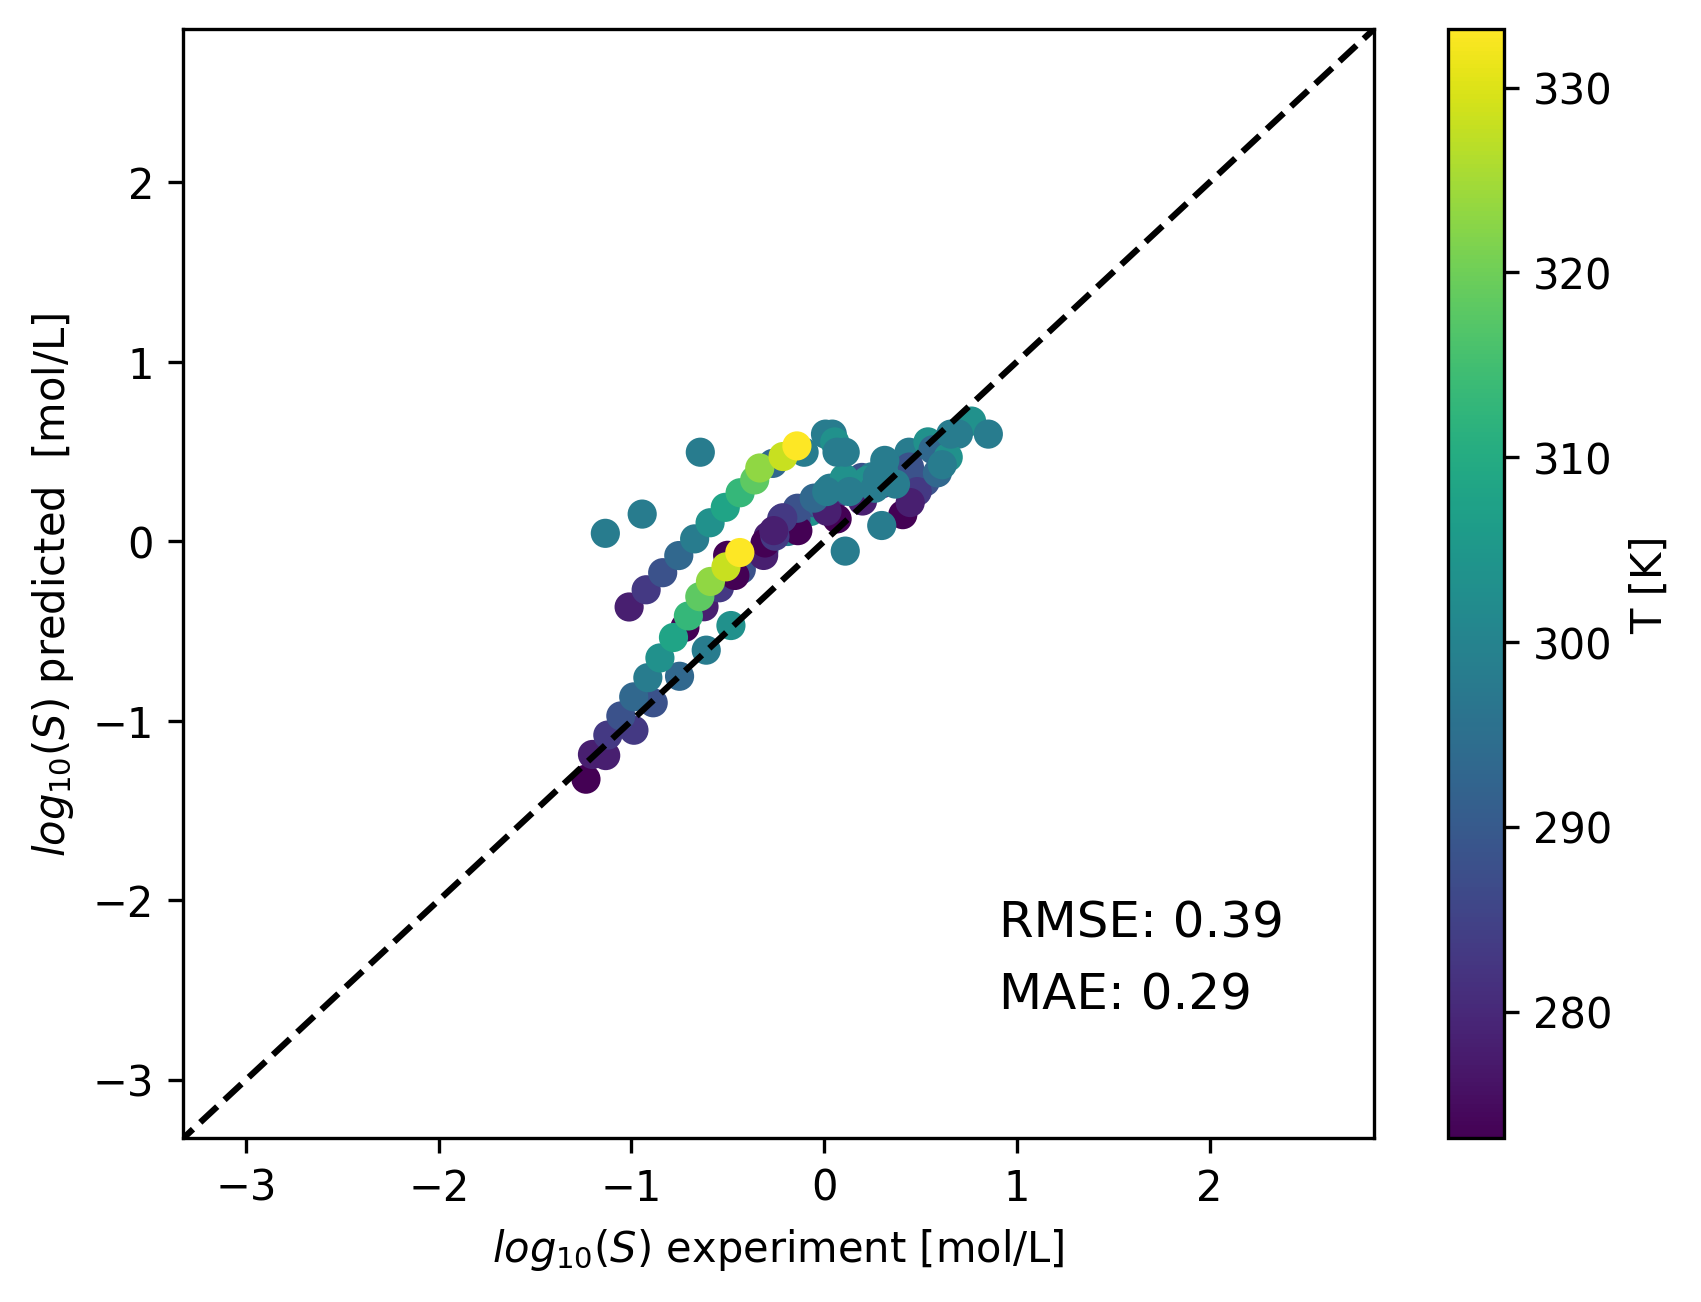

In [26]:
import matplotlib.pyplot as plt
def mae(x,y):
    return np.round(np.nanmean(np.abs(x-y)),2)

def rmse(x,y):
    return np.round(np.sqrt(np.nanmean((x-y)**2)),2)
fig, ax = plt.subplots(dpi=300)
ax_ = ax.scatter(df['logS'],logS, c=df['Temperature [K]'])
cb = plt.colorbar(ax_)
plt.plot(np.arange(-100,100),np.arange(-100,100),'--',color='k')
plt.ylabel('$log_{10}(S)$ predicted  [mol/L]')
plt.xlabel('$log_{10}(S)$ experiment [mol/L]')
cb.set_label('T [K]')
fig.text(.55,0.25,'RMSE: '+str(rmse(df['logS'].values,logS)),fontsize=12)
fig.text(.55,0.2,'MAE: '+str(mae(df['logS'].values,logS)),fontsize=12)

# plt.tight_layout()
max_l = np.max([np.max(df['logS']),np.max(logS)])+2
min_l = np.min([np.min(df['logS']),np.min(logS)])-2
# plt.tight_layout()
plt.ylim([min_l,max_l])
plt.xlim([min_l,max_l])
plt.show()
